## MOwNiT / Laboratorium 1 - Arytmetyka komputerowa / Dominik Jędraszek 406420

### Zadanie 1

In [2]:
decode(x::Float16) = (b=bitstring(x); (b[1], b[2:6], b[7:16]))
decode(x::Float32) = (b=bitstring(x); (b[1], b[2:9], b[10:32]))
decode(x::Float64) = (b=bitstring(x); (b[1], b[2:12], b[12:64]))

function info(a) println("Zapis: ",significand(a), " * 2^", exponent(a),"\nReprezentacja: ",decode(a)) end 

info (generic function with 1 method)

Wypiszmy informacje o danych reprezentacjach tej samej liczby (funkcją napisaną powyzej):

In [3]:
info(Float16(1/3))

Zapis: 1.333 * 2^-2
Reprezentacja: ('0', "01101", "0101010101")


In [4]:
info(Float32(1/3))

Zapis: 1.3333334 * 2^-2
Reprezentacja: ('0', "01111101", "01010101010101010101011")


In [5]:
info(Float64(1/3))

Zapis: 1.3333333333333333 * 2^-2
Reprezentacja: ('0', "01111111101", "10101010101010101010101010101010101010101010101010101")


In [6]:
info(Float64(Float16(1/3)))

Zapis: 1.3330078125 * 2^-2
Reprezentacja: ('0', "01111111101", "10101010101000000000000000000000000000000000000000000")


Dla kolejnych reprezntacji Float wieksza czesc pamieci przyznaje mantysie. (10,23,52)

Cecha 'Float64' i zrzutowanej na Float64 'Float16' liczby 1/3 jest taka sama.

Rzutowanie powoduje nieoczywiste rozwiniecie dziesietne mantysy (.3330078...)

Rzutowany Float16 jest blizej rzeczywistej liczby niz Float16.

In [7]:
Float64(Float16(1/3))==Float16(1/3)

true

Kolejne bity zrzutownej Float16 i Float16 dla tej samej liczby sa sobie rowne.

In [8]:
eps(Float16(1/3)) , eps(Float32(1/3)) , eps(Float64(1/3)),eps(Float64(Float16(1/3)))

(Float16(0.0002441), 2.9802322f-8, 5.551115123125783e-17, 5.551115123125783e-17)

Odstęp między kolejnymi liczbami zmiennoprzecinkowymi reprezentowanymi w komputerze jest najmniejszy dla Float64.

Jest taki sam dla Float64 i zrzutowanej na Float64 Float16. (Bo o odstepie mówi nam cecha)

### Zadanie 2

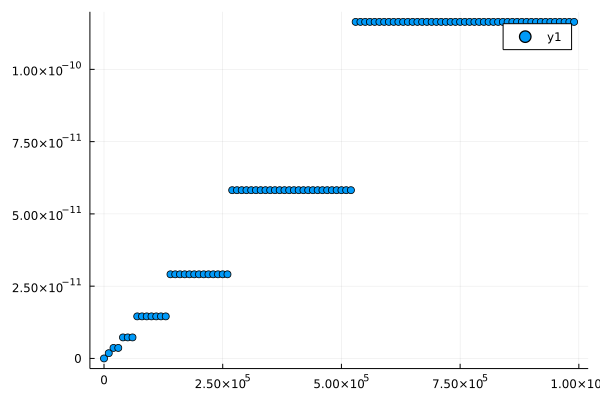

In [9]:
#import Pkg; Pkg.add("Plots")
using Plots
scatter(1:10000:1000000,map((x) -> eps(Float64(x)),1:10000:1000000) )

Im większa liczba tym większy odstęp między kolejnymi liczbami zmiennoprzecinkowymi reprezenotwanymi w komputerze.
Powstają schodki, które są spowodowane zmianami bitu w cesze. Cecha wpływa na zakres. 

### Zadanie 3

##### Obserwacja jak zmienia sie cecha i mantysa dla coraz mniejszych liczb z użyciem GSL.

Poniżej kod oraz wyniki programu, który dzieli liczbę 1e-32 przez 2 dopóki liczba nie będzie równa 0.

```C
#include <stdio.h>
#include <gsl/gsl_ieee_utils.h>

int main ()
{
printf("---mantysa ---- cecha----\n");
  float f = 1e-32;
  while(f>0.0)
  {
	gsl_ieee_printf_float(&f);printf("\n");
  	f /= 2.0;
  }
  return 0;
}
```

```
---mantysa ---- cecha----
 1.10011111011000100011111*2^-107
 1.10011111011000100011111*2^-108
 1.10011111011000100011111*2^-109
 1.10011111011000100011111*2^-110
 1.10011111011000100011111*2^-111
 1.10011111011000100011111*2^-112
 1.10011111011000100011111*2^-113
 1.10011111011000100011111*2^-114
 1.10011111011000100011111*2^-115
 1.10011111011000100011111*2^-116
 1.10011111011000100011111*2^-117
 1.10011111011000100011111*2^-118
 1.10011111011000100011111*2^-119
 1.10011111011000100011111*2^-120
 1.10011111011000100011111*2^-121
 1.10011111011000100011111*2^-122
 1.10011111011000100011111*2^-123
 1.10011111011000100011111*2^-124
 1.10011111011000100011111*2^-125
 1.10011111011000100011111*2^-126
 0.11001111101100010010000*2^-126  <- od tego momentu liczba przestaje być znormalizowana.
 0.01100111110110001001000*2^-126
 0.00110011111011000100100*2^-126
 0.00011001111101100010010*2^-126
 0.00001100111110110001001*2^-126
 0.00000110011111011000100*2^-126
 0.00000011001111101100010*2^-126
 0.00000001100111110110001*2^-126
 0.00000000110011111011000*2^-126
 0.00000000011001111101100*2^-126
 0.00000000001100111110110*2^-126
 0.00000000000110011111011*2^-126
 0.00000000000011001111110*2^-126
 0.00000000000001100111111*2^-126
 0.00000000000000110100000*2^-126
 0.00000000000000011010000*2^-126
 0.00000000000000001101000*2^-126
 0.00000000000000000110100*2^-126
 0.00000000000000000011010*2^-126
 0.00000000000000000001101*2^-126
 0.00000000000000000000110*2^-126
 0.00000000000000000000011*2^-126
 0.00000000000000000000010*2^-126
 0.00000000000000000000001*2^-126
```

Mantysa przestaje być znormalizowana, kiedy pierwszy bit mantysy zaczyna się zerować (wyjątek - 0). Dzieje się tak, gdyż cecha liczby osiąga swoje minimum (nie może być mniejsza), więc zmniejszana jest wtedy mantysa.

### Zadanie 4

### Algorytmem niestabilnym numerycznie wybranym przeze mnie jest algorytm liczenia funkcji podanej wzorem:

In [10]:
function f(x) return if x==0 return 1 else (1-cos(x)^2)/x^2 end end

f (generic function with 1 method)

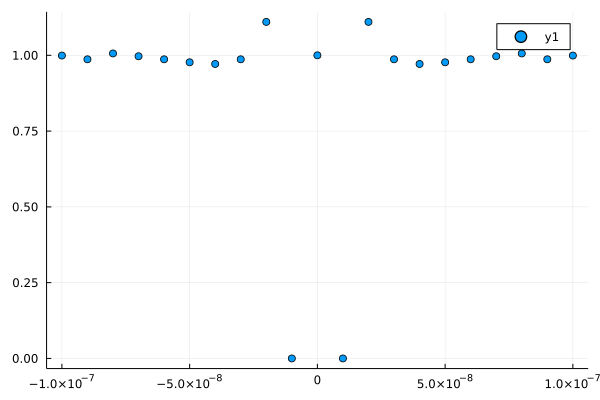

In [11]:
using Plots
scatter(-0.0000001:0.00000001:0.0000001,map((x) -> f(x),-0.0000001:0.00000001:0.0000001) )

#### Działa źle?

Jak widać na wygenerowanym obrazku, komputerowy wykres funkcji f "nie oddaje realiów", funkcja ta w rzeczywistości rośnie do 1, a następnie maleje.

#### Dlaczego tak?

Jest to spowodowane zbyt dużym zaokrąglaniem cosinusa w funkcji f przez komputer. Skutkuje to rysowaniem wykresu funkcji odbiegającym od rzeczywistego.

#### Wersja stabilna

Poniżej zmodyfikowana funkcji f (dzięki zastosowaniu "jedynki trygonometrycznej" i wyprowadzeniu potęgi za ułamek)

In [12]:
function g(x) return if x==0 return 1 else (sin(x)/x)^2 end end

g (generic function with 1 method)

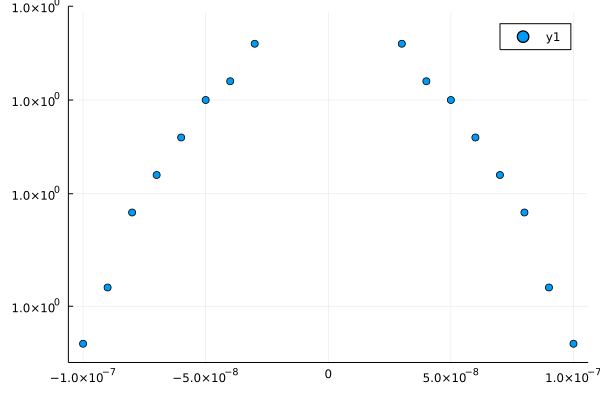

GKS: Possible loss of precision in routine SET_WINDOW


In [13]:
using Plots
scatter(-0.0000001:0.00000001:0.0000001,map((x) -> g(x),-0.0000001:0.00000001:0.0000001) )

Interpretowana przez komputer funkcja g lepiej ukazuje realia, widać to po monotoniczności funkcji.